
DataFrame after eliminating rows with num_lectures equal to zero:
      course_id                                       course_title  \
0       41295.0               Learn HTML5 Programming From Scratch   
1       59014.0                     Coding for Entrepreneurs Basic   
2      625204.0                         The Web Developer Bootcamp   
3      173548.0  Build Your First Website in 1 Week with HTML5 ...   
4      764164.0              The Complete Web Developer Course 2.0   
...         ...                                                ...   
3675  1216340.0                  Learn to Play Sweet Child of Mine   
3676  1026762.0  Coaching Course: Rhythm Instruction for Music ...   
3677  1223240.0  Learn Pirates of the Caribbean by Ear on the P...   
3678  1224186.0  Learn to Play Piano Like a Pro - Easy Piano Co...   
3679  1234656.0                              4 Week Rhythm Mastery   

                                                    url  price  \
0     https://www.udemy.co


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

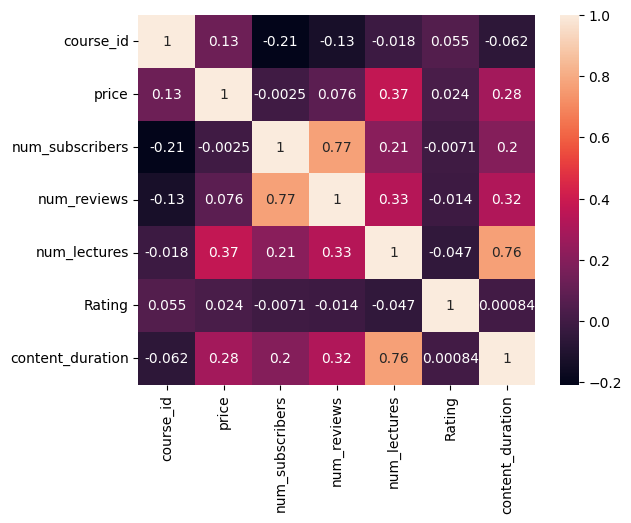

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\user\\Desktop\\gpp2\\3.1-data-sheet-guvi-courses.csv")

# Drop rows with null values in-place
df.dropna(inplace=True)

import seaborn as sns

! pip install tabulate

import pandas as pd


# Drop rows where num_lectures is zero in-place
df.drop(df[df['num_lectures'] == 0].index, inplace=True)

# Display the modified DataFrame
print("\nDataFrame after eliminating rows with num_lectures equal to zero:")
print(df)
print('\n')
print('\n')

import numpy as np

df['num_subscribers'] = np.sqrt(df['num_subscribers'])
df['num_reviews'] = np.sqrt(df['num_reviews'])
df['num_lectures'] = np.sqrt(df['num_lectures'])
#df['content_duration'] = np.sqrt(df['content_duration'])
df['price'] = np.sqrt(df['price'])
df['course_id'] = np.sqrt(df['course_id'])

x=df[['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'Rating', 'content_duration']].corr()
sns.heatmap(x, annot=True)




In [2]:
df = df.drop_duplicates()

In [3]:
# split to X and y
X=df[['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration','course_title','level','subject']]
y=df['Rating']

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['level']])
X_ohe = ohe.fit_transform(X[['level']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['subject']])
X_be = ohe2.fit_transform(X[['subject']]).toarray()
# independent features after encoding
X = np.concatenate((X[['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = np.sqrt(y)
#y = np.log1p(y)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
import pandas as pd
import numpy as np


# Create a Random Forest Regressor with specified hyperparameters
rf_regressor = RandomForestRegressor(max_depth= 29,min_samples_split=20,min_samples_leaf=4,n_estimators=400, random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:',mse)
print('R-squared (R2) Score:',r2)

Mean Squared Error: 0.03718460509644538
R-squared (R2) Score: 0.4142241550334088


In [ ]:
import pickle

# ... (all the code you provided above, including model training)

# Specify the filename for the pickle file
model_filename = 'random_forest_regressor_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(rf_regressor, file)

print(f'Model saved to {model_filename}')

In [ ]:
# Save the StandardScaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Save the OneHotEncoder for 'level'
ohe_level_filename = 'ohe_level.pkl'
with open(ohe_level_filename, 'wb') as file:
    pickle.dump(ohe, file)

# Save the OneHotEncoder for 'subject'
ohe_subject_filename = 'ohe_subject.pkl'
with open(ohe_subject_filename, 'wb') as file:
    pickle.dump(ohe2, file)

print('Preprocessing objects saved successfully')

In [6]:
import pickle

# Load the model
model_filename = 'random_forest_regressor_model.pkl'
with open(model_filename, 'rb') as file:
    rf_regressor = pickle.load(file)

# Load the StandardScaler
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'rb') as file:
    scaler = pickle.load(file)

# Load the OneHotEncoder for 'level'
ohe_level_filename = 'ohe_level.pkl'
with open(ohe_level_filename, 'rb') as file:
    ohe_level = pickle.load(file)

# Load the OneHotEncoder for 'subject'
ohe_subject_filename = 'ohe_subject.pkl'
with open(ohe_subject_filename, 'rb') as file:
    ohe_subject = pickle.load(file)

print('Model and preprocessing objects loaded successfully')


Model and preprocessing objects loaded successfully


In [7]:
#X[['course_id', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].values, X_ohe, X_be

new_sample = np.array([[np.sqrt(41295), np.sqrt(0), np.sqrt(268923), np.sqrt(8629),np.sqrt(45),10.5,'Beginner Level','Subject: Web Development']])
new_sample_ohe = ohe_level.transform(new_sample[:, [6]]).toarray()
new_sample_ohe2 = ohe_subject.transform(new_sample[:, [7]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5]], new_sample_ohe,new_sample_ohe2), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = rf_regressor.predict(new_sample)
new_pred

C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0.825597])

In [ ]:
# Example: Preprocess new text using the loaded function and make predictions
new_text = "New tweet text here."
preprocessed_text = loaded_preprocess_tweet(new_text)
new_text_vectorized = loaded_vectoriser.transform([preprocessed_text])
prediction = loaded_classifier.predict(new_text_vectorized)

print("Predicted class:", prediction[0])

In [ ]:
df['num_subscribers'] = np.sqrt(df['num_subscribers'])
df['num_reviews'] = np.sqrt(df['num_reviews'])
df['num_lectures'] = np.sqrt(df['num_lectures'])
#df['content_duration'] = np.sqrt(df['content_duration'])
df['price'] = np.sqrt(df['price'])
df['course_id'] = np.sqrt(df['course_id'])



# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['level']])
X_ohe = ohe.fit_transform(X[['level']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['subject']])
X_be = ohe2.fit_transform(X[['subject']]).toarray()